# Nearest Neighbour

Nearest Neighbor Path: [0, 7, 1, 5, 9, 8, 4, 3, 6, 2]
Nearest Neighbor Distance: 241.99


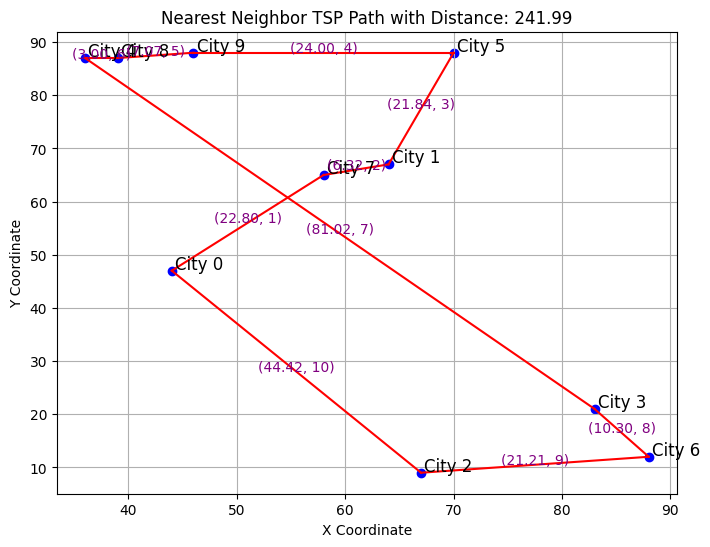

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

number_of_cities = 10

# Randomly generate coordinates for each city
coordinates = np.random.randint(0, 100, (number_of_cities, 2))

# Function to calculate the Euclidean distance between two points
def euclidean_distance(point1, point2):
    return np.linalg.norm(point1 - point2)

# Function to calculate the total distance for a given path
def calculate_total_distance(path, coordinates):
    total_distance = 0
    for i in range(len(path) - 1):
        total_distance += euclidean_distance(coordinates[path[i]], coordinates[path[i + 1]])
    total_distance += euclidean_distance(coordinates[path[-1]], coordinates[path[0]])  # Return to the starting point
    return total_distance

# Nearest Neighbor Heuristic for TSP
def tsp_nearest_neighbor(coordinates, start=0):
    n = len(coordinates)
    visited = [False] * n
    path = [start]
    visited[start] = True
    
    current_city = start
    while len(path) < n:
        nearest_city = None
        nearest_distance = float('inf')
        
        for next_city in range(n):
            if not visited[next_city]:
                distance = euclidean_distance(coordinates[current_city], coordinates[next_city])
                if distance < nearest_distance:
                    nearest_distance = distance
                    nearest_city = next_city
        
        path.append(nearest_city)
        visited[nearest_city] = True
        current_city = nearest_city

    return path, calculate_total_distance(path, coordinates)

# Solve TSP using Nearest Neighbor Heuristic
optimal_path, optimal_distance = tsp_nearest_neighbor(coordinates)

print(f"Nearest Neighbor Path: {optimal_path}")
print(f"Nearest Neighbor Distance: {optimal_distance:.2f}")

# Visualization with edge labels for distance and path sequence
def plot_tsp_path(optimal_path, coordinates):
    plt.figure(figsize=(8, 6))
    for i, coord in enumerate(coordinates):
        plt.scatter(coord[0], coord[1], color='blue')
        plt.text(coord[0] + 0.3, coord[1] + 0.3, f"City {i}", fontsize=12)
    
    # Plot the optimal path
    for seq_num in range(len(optimal_path)):
        start_city = optimal_path[seq_num]
        end_city = optimal_path[(seq_num + 1) % len(optimal_path)]
        
        # Plot the edge
        plt.plot([coordinates[start_city][0], coordinates[end_city][0]],
                 [coordinates[start_city][1], coordinates[end_city][1]], 'r-')
        
        # Midpoint of the edge for labeling
        mid_x = (coordinates[start_city][0] + coordinates[end_city][0]) / 2
        mid_y = (coordinates[start_city][1] + coordinates[end_city][1]) / 2
        
        # Label with (Distance, Path Sequence Number)
        edge_distance = euclidean_distance(coordinates[start_city], coordinates[end_city])
        plt.text(mid_x, mid_y, f"({edge_distance:.2f}, {seq_num + 1})",
                 fontsize=10, color='purple', ha='center')

    plt.title(f"Nearest Neighbor TSP Path with Distance: {optimal_distance:.2f}")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.grid(True)
    plt.show()

# Plot the result
plot_tsp_path(optimal_path, coordinates)
